<a href="https://colab.research.google.com/github/kouchan0708/Naka-Kotaro-quant-macro-last-assignment/blob/main/quant_macro_last_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

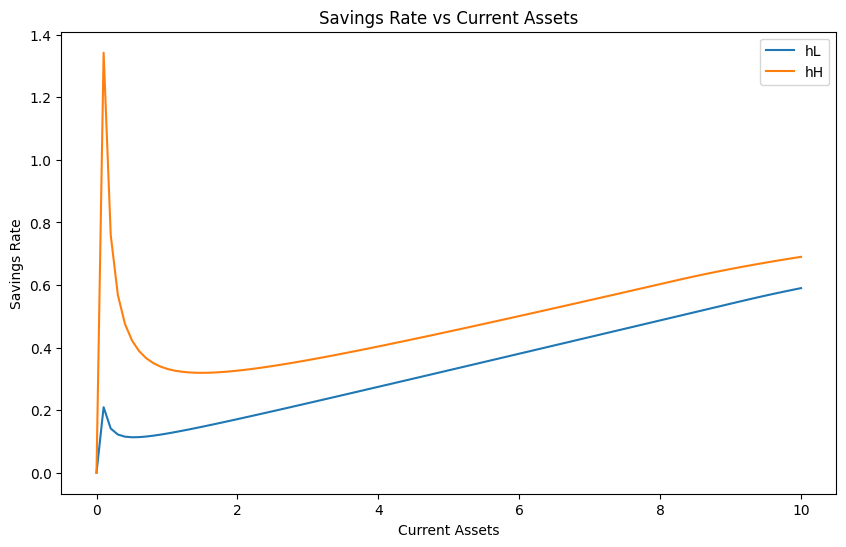

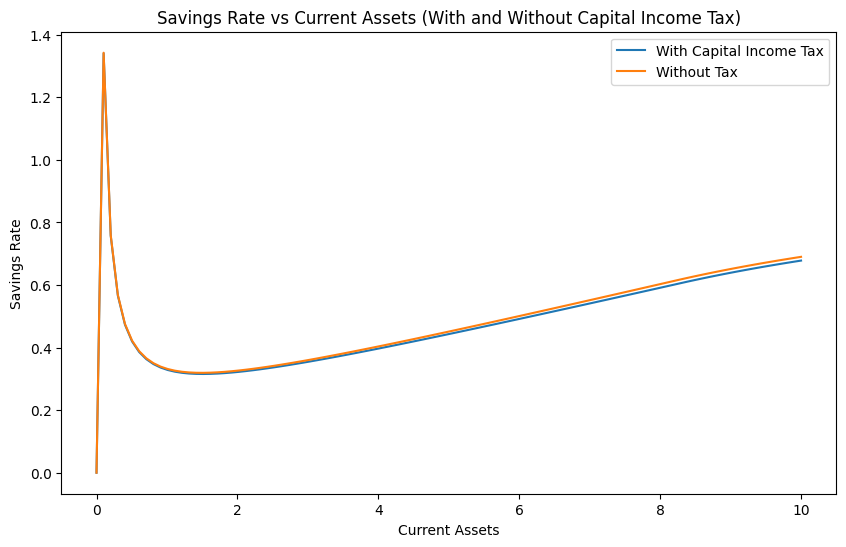

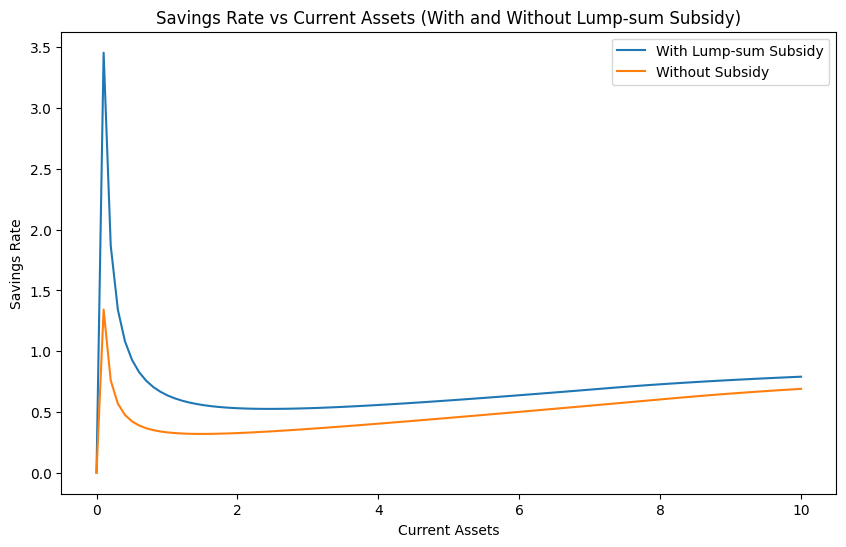

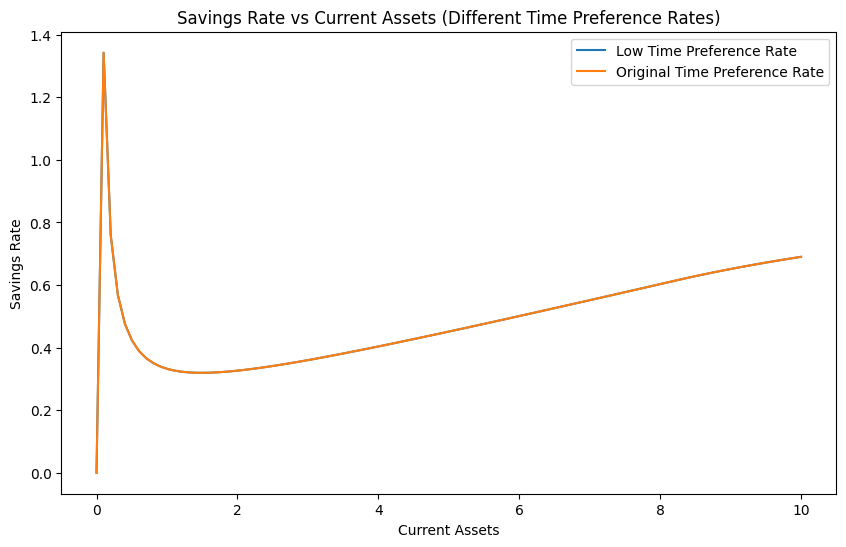

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定数の設定
sigma = 1.5
beta = 0.98
rho = 0.6
sigma_epsilon = 0.6
r = 0.04
w = 1
hL, hH = 0.5, 1.5  # 生産性のグリッド

# 効用関数
def utility(c):
    return (c**(1 - sigma)) / (1 - sigma)

# 予算制約
def budget_constraint(a, h, next_a):
    return w * h + (1 + r) * a - next_a

# 1. 生産性のグリッドとマルコフ過程の離散化
assets = np.linspace(0, 10, 100)  # 資産のグリッド
savings_rate_hL = []
savings_rate_hH = []

for a in assets:
    # aの次期の資産のグリッド
    next_assets = np.linspace(0, 10, 100)
    # 各次期の資産に対する貯蓄率を計算
    next_a_hL = np.maximum(0, budget_constraint(a, hL, next_assets))
    next_a_hH = np.maximum(0, budget_constraint(a, hH, next_assets))
    savings_rate_hL.append(next_a_hL / a if a != 0 else np.zeros_like(next_a_hL))
    savings_rate_hH.append(next_a_hH / a if a != 0 else np.zeros_like(next_a_hH))

savings_rate_hL = np.array(savings_rate_hL)
savings_rate_hH = np.array(savings_rate_hH)

plt.figure(figsize=(10, 6))
plt.plot(assets, savings_rate_hL.mean(axis=1), label='hL')
plt.plot(assets, savings_rate_hH.mean(axis=1), label='hH')
plt.xlabel('Current Assets')
plt.ylabel('Savings Rate')
plt.legend()
plt.title('Savings Rate vs Current Assets')
plt.show()

# 2. 資本所得税を導入した場合
tau_k = 0.3
savings_rate_tax = []

for a in assets:
    next_a_tax = np.maximum(0, w * hH + (1 + (1 - tau_k) * r) * a - next_assets)
    savings_rate_tax.append(next_a_tax / a if a != 0 else np.zeros_like(next_a_tax))

savings_rate_tax = np.array(savings_rate_tax)

plt.figure(figsize=(10, 6))
plt.plot(assets, savings_rate_tax.mean(axis=1), label='With Capital Income Tax')
plt.plot(assets, savings_rate_hH.mean(axis=1), label='Without Tax')
plt.xlabel('Current Assets')
plt.ylabel('Savings Rate')
plt.legend()
plt.title('Savings Rate vs Current Assets (With and Without Capital Income Tax)')
plt.show()

# 3. 一括補助金を導入した場合
T = 1
savings_rate_subsidy = []

for a in assets:
    next_a_subsidy = np.maximum(0, w * hH + (1 + r) * a + T - next_assets)
    savings_rate_subsidy.append(next_a_subsidy / a if a != 0 else np.zeros_like(next_a_subsidy))

savings_rate_subsidy = np.array(savings_rate_subsidy)

plt.figure(figsize=(10, 6))
plt.plot(assets, savings_rate_subsidy.mean(axis=1), label='With Lump-sum Subsidy')
plt.plot(assets, savings_rate_hH.mean(axis=1), label='Without Subsidy')
plt.xlabel('Current Assets')
plt.ylabel('Savings Rate')
plt.legend()
plt.title('Savings Rate vs Current Assets (With and Without Lump-sum Subsidy)')
plt.show()

# 4. 時間選好率を低くした場合
beta_low = 0.5
savings_rate_low_beta = []

for a in assets:
    next_a_low_beta = np.maximum(0, budget_constraint(a, hH, next_assets))
    savings_rate_low_beta.append(next_a_low_beta / a if a != 0 else np.zeros_like(next_a_low_beta))

savings_rate_low_beta = np.array(savings_rate_low_beta)

plt.figure(figsize=(10, 6))
plt.plot(assets, savings_rate_low_beta.mean(axis=1), label='Low Time Preference Rate')
plt.plot(assets, savings_rate_hH.mean(axis=1), label='Original Time Preference Rate')
plt.xlabel('Current Assets')
plt.ylabel('Savings Rate')
plt.legend()
plt.title('Savings Rate vs Current Assets (Different Time Preference Rates)')
plt.show()


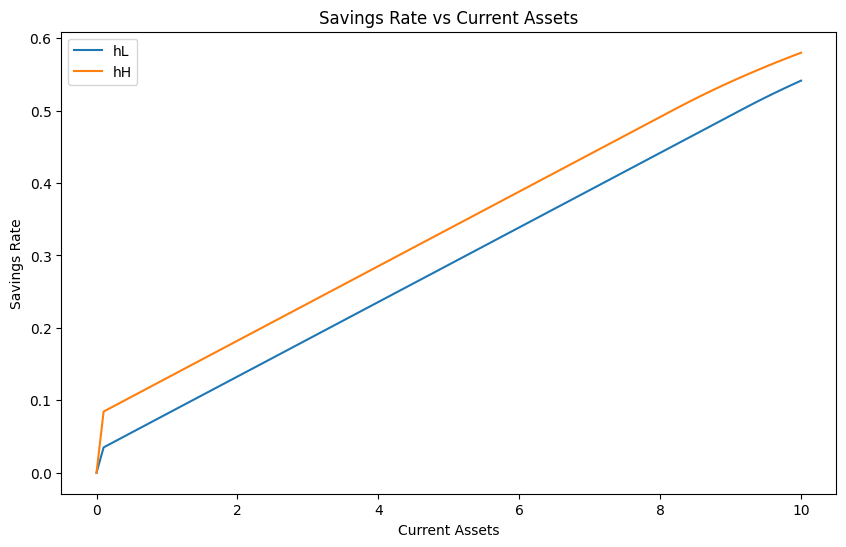

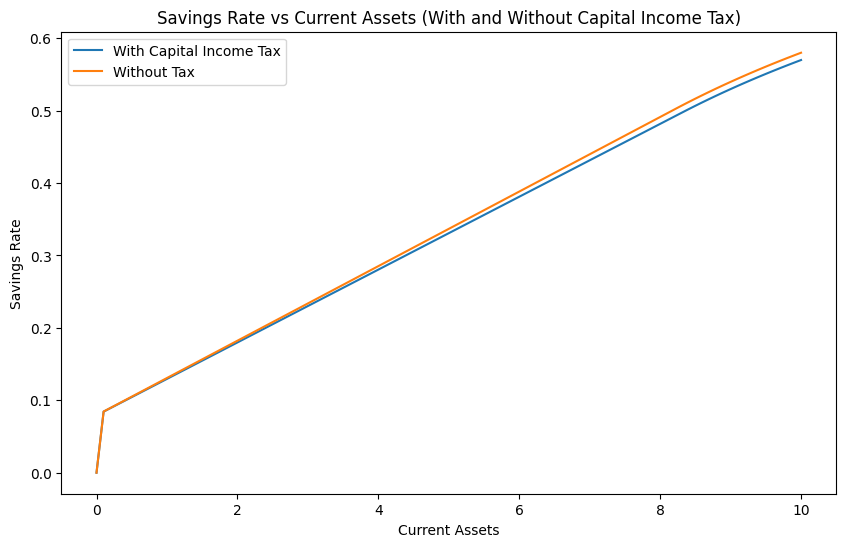

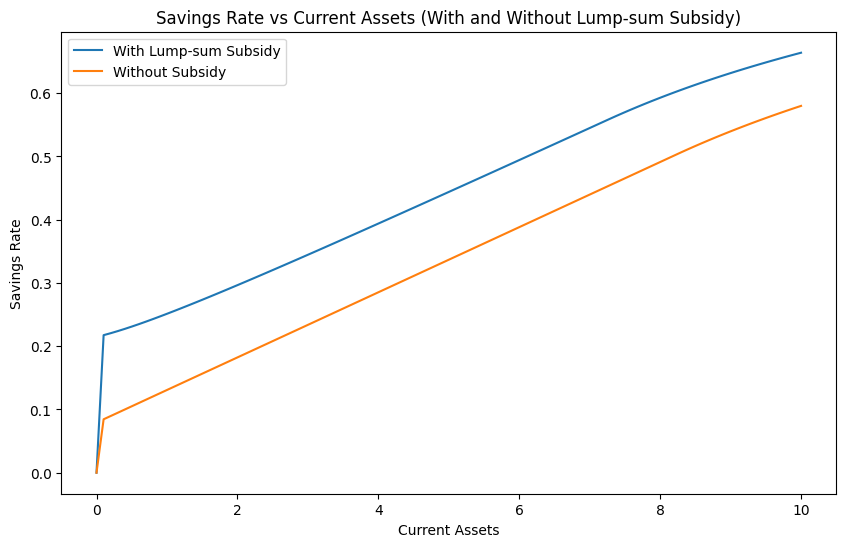

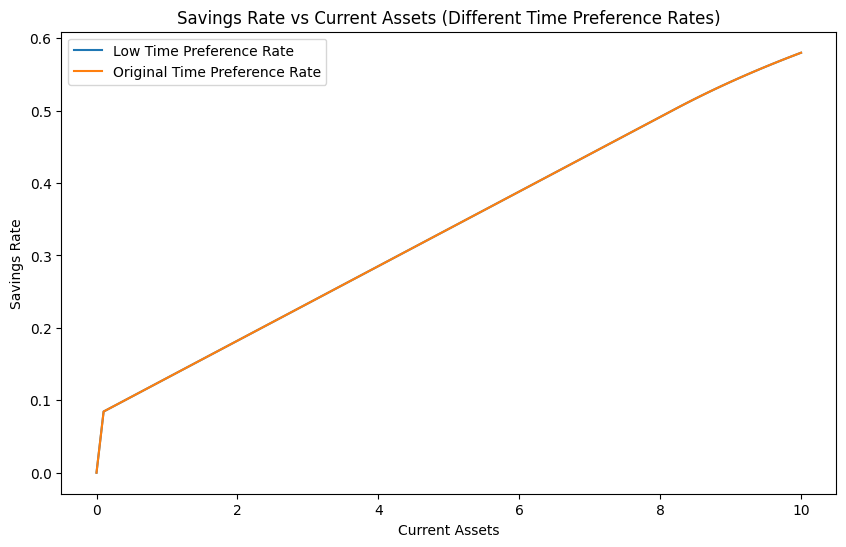

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定数の設定
sigma = 1.5
beta = 0.98
rho = 0.6
sigma_epsilon = 0.6
r = 0.04
w = 1
hL, hH = 0.5, 1.5  # 生産性のグリッド

# 効用関数
def utility(c):
    return (c**(1 - sigma)) / (1 - sigma)

# 予算制約
def budget_constraint(a, h, next_a):
    return w * h + (1 + r) * a - next_a

# 貯蓄率の計算
def savings_rate(a, h, next_a):
    c = w * h + (1 + r) * a - next_a
    return next_a / (c + next_a)

# 1. 生産性のグリッドとマルコフ過程の離散化
assets = np.linspace(0, 10, 100)  # 資産のグリッド
savings_rate_hL = []
savings_rate_hH = []

for a in assets:
    next_assets = np.linspace(0, 10, 100)
    next_a_hL = np.maximum(0, budget_constraint(a, hL, next_assets))
    next_a_hH = np.maximum(0, budget_constraint(a, hH, next_assets))
    if a != 0:
        savings_rate_hL.append(savings_rate(a, hL, next_a_hL))
        savings_rate_hH.append(savings_rate(a, hH, next_a_hH))
    else:
        savings_rate_hL.append(np.zeros_like(next_a_hL))
        savings_rate_hH.append(np.zeros_like(next_a_hH))

savings_rate_hL = np.array(savings_rate_hL)
savings_rate_hH = np.array(savings_rate_hH)

plt.figure(figsize=(10, 6))
plt.plot(assets, savings_rate_hL.mean(axis=1), label='hL')
plt.plot(assets, savings_rate_hH.mean(axis=1), label='hH')
plt.xlabel('Current Assets')
plt.ylabel('Savings Rate')
plt.legend()
plt.title('Savings Rate vs Current Assets')
plt.show()

# 2. 資本所得税を導入した場合
tau_k = 0.3
savings_rate_tax = []

for a in assets:
    next_assets = np.linspace(0, 10, 100)
    next_a_tax = np.maximum(0, w * hH + (1 + (1 - tau_k) * r) * a - next_assets)
    if a != 0:
        savings_rate_tax.append(savings_rate(a, hH, next_a_tax))
    else:
        savings_rate_tax.append(np.zeros_like(next_a_tax))

savings_rate_tax = np.array(savings_rate_tax)

plt.figure(figsize=(10, 6))
plt.plot(assets, savings_rate_tax.mean(axis=1), label='With Capital Income Tax')
plt.plot(assets, savings_rate_hH.mean(axis=1), label='Without Tax')
plt.xlabel('Current Assets')
plt.ylabel('Savings Rate')
plt.legend()
plt.title('Savings Rate vs Current Assets (With and Without Capital Income Tax)')
plt.show()

# 3. 一括補助金を導入した場合
T = 1
savings_rate_subsidy = []

for a in assets:
    next_assets = np.linspace(0, 10, 100)
    next_a_subsidy = np.maximum(0, w * hH + (1 + r) * a + T - next_assets)
    if a != 0:
        savings_rate_subsidy.append(savings_rate(a, hH, next_a_subsidy))
    else:
        savings_rate_subsidy.append(np.zeros_like(next_a_subsidy))

savings_rate_subsidy = np.array(savings_rate_subsidy)

plt.figure(figsize=(10, 6))
plt.plot(assets, savings_rate_subsidy.mean(axis=1), label='With Lump-sum Subsidy')
plt.plot(assets, savings_rate_hH.mean(axis=1), label='Without Subsidy')
plt.xlabel('Current Assets')
plt.ylabel('Savings Rate')
plt.legend()
plt.title('Savings Rate vs Current Assets (With and Without Lump-sum Subsidy)')
plt.show()

# 4. 時間選好率を低くした場合
beta_low = 0.5
savings_rate_low_beta = []

for a in assets:
    next_assets = np.linspace(0, 10, 100)
    next_a_low_beta = np.maximum(0, budget_constraint(a, hH, next_assets))
    if a != 0:
        savings_rate_low_beta.append(savings_rate(a, hH, next_a_low_beta))
    else:
        savings_rate_low_beta.append(np.zeros_like(next_a_low_beta))

savings_rate_low_beta = np.array(savings_rate_low_beta)

plt.figure(figsize=(10, 6))
plt.plot(assets, savings_rate_low_beta.mean(axis=1), label='Low Time Preference Rate')
plt.plot(assets, savings_rate_hH.mean(axis=1), label='Original Time Preference Rate')
plt.xlabel('Current Assets')
plt.ylabel('Savings Rate')
plt.legend()
plt.title('Savings Rate vs Current Assets (Different Time Preference Rates)')
plt.show()
